# Problem Set 6: Neural Networks


<span style="color:red">Warning!</span> Some of the problems in this problem set require heavy computation - you are encouraged to start early so that you don't get stuck at the last minute.

# Section 1: Neural Network Architecture

In the first section of this problem set, we'll spend some time examining neural network model architecture. Please type in your answers after each question -- this section requires no coding.

### Question 1.1

Consider an input image of dimensions 150 X 150 X 3: i.e., height and width of 150 pixels, with 3 channels. 

- 1.1.1 Suppose you feed this image into a fully connected (dense) layer with 512 neurons. How many learnable / trainable parameters (or weights) does this layer have?
    
- 1.1.2 Now, suppose we feed this image into a Conv2D layer with 512 filters, kernel size 3 x 3, and stride 1 (assume 0 padding). How many learnable / trainable parameters (or weights) does this layer have?

#### Your Answer Here

1.1.1: `34,560,512`

- **input layer**: `150 * 150 * 3` = `67,500` nodes

- **output layer**: `512` neurons

- **biases**: `512`

- `67,500 * 512 + 512` ==> **total params** = `34,560,512`

1.1.2: `14,336`

- **input layer**: `150 * 150 * 3` = `67,500` nodes

- **kernel size**: `3x3`

- **stride**: `1`, **padding**: `0`

- **filters**: `512`

- **output_width** = (`input_width` - `kernel_width` + `padding_width` + 1)/`stride`) == **output_height**

- `(F x F x C + 1) * K` = `(3 * 3 * 3 + 1) * 512` ==> **total params** = `14,336`


### Question 1.2

Consider the following CNN, and answer the related questions. Assume that your input images are of dimensions (150, 150, 3): i.e., height and width of 150 pixels, with 3 channels.

**1.2.1**: Complete the table -- fill in the missing entries (A, B, C, D). For each missing entry, provide a brief explanation for your answer (No more than 2 brief sentences.)

- Hint: The Keras documentation [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/) will be of use

![Model image](images/model1-verbose.png)

**1.2.2**: Report the total number of parameters in this model?

**1.2.3**: Consider Layer 2 from above. Suppose we change the stride to 2, how does it affect the output shape (A) that you calculated above? How does it affect the number of parameters (B)?

#### Your Answer Here

**1.2.1**: 

- *A*: `(146, 146, 64)`. Assuming the input dimensions are the outputs from the previous layer, it will take in a 148x148 convolution, thus we can compute output dimension as follows:
        output_width = output_height = (148 - 3 + 0 + 1)/1) = 146x146 then 64 filters will make it `146 * 146 * 64`.

- *B*: `162,996`. The number of parameters is the kernel size of the filter plus 1 (for bias) and then multiplied by the number of filters. However, in this case, the kernel size incorporates the convolutions applied in the previous layer, and thus it no longer uses 3 (RGB) channels, but 32 channels from the previous layers. Thus: `(3 * 3 * 32 + 1) * 64` = `162,996`

- *C*: `(73, 73, 64)`. For a maxPooling layer, we calculate each output_dimension as the corresponding the `pool_size` less than the `input_dimension` divded by the `stride_length` (floored) plus 1. Thus: `floor((146 - 2)/2) + 1` = `73`, then the number of channels is simply the number of filters themselves. 

- *D*: `32,928`. Here we apply the same logic as in part B, however, with 71 channels instead of 146, resulting in `3 * 3 * 64 + 1` = `32,928`


**1.2.2**: `196,120`
    
**1.2.3**: *A*: `(73, 73, 64)`, *B*: `162,996`. If layer 2 used a stride length of 2, we'd calculate its related stats similarly but divide each dimension by the stride length (before adding 1 and flooring it to be safe). Thus we'd end up with `floor(((148-3)/2) + 1)` = `73`, for a final output shape of (73, 73, 64). The number of parameters however would be un-changed since it only depends on the number of filter size, the number of filters and how many input channels they are applied to (which have all remained unchanged in this scenario).






# Section 2: Truck v/s Cars: Neural Networks and Image Classification

Your goal for this problem set is to train neural network models for image classification. Specifically, your task is to train models that correctly predict where the vehicle in a given image is a truck, or a car / automobile.

It might be useful to start by implementing this entire problem set on a relatively small subset of all of the images first, before using the full dataset.

## 2.1. Load Data +  Exploratory Analysis

For this problem, we'll load the [CIFAR 10](https://keras.io/api/datasets/cifar10/) dataset, from the Keras API. This dataset has been widely used in ML and computer vision research -- you can read more about the state of the art model performance (and how this has improved over time) [here](https://en.wikipedia.org/wiki/CIFAR-10).

The CIFAR 10 dataset originally has 10 classes -- we've provided helper code below to load the data, and remove images belonging to unnecessary classes. We will use this dataset for a supervised binary classification problem.

Your tasks:
 - Extract a validation set from your training data. Keep 70% of the images for training, while the remainder will be used for validation. 
 - Examine a single image in from your training set. Report the dimensions (width, height, number of channels.) Plot each channel.
 - Select 9 random images from your training set. Plot these images in a 3 X 3 grid, along with the corresponding category / label
 - Plot the distribution of labels in your training, validation and test sets. 


In [3]:
from keras.datasets import cifar10
import numpy as np
def cifar_2classes():
    """
    Helper code to clean the CIFAR 10 dataset, and remove the unnecessary classes. 
    """
    ## Load data
    label_names = ["airplane", 
             "automobile",
             "bird",
             "cat",
             "deer",
             "dog",
             "frog",
             "horse",
             "ship",
             "truck"]


    label_map = {0:99, 1:0, 2:99, 3:99, 4:99, 5:99, 6:99, 7:99, 8:99, 9:1}
    
    (X_train_val, y_train_val), (X_test, y_test) = cifar10.load_data()

    (X_train_val, y_train_val), (X_test, y_test) = cifar10.load_data()
    y_train_val1 = np.array([[label_map[y[0]]] for y in y_train_val])
    y_test1 = np.array([[label_map[y[0]]] for y in y_test])
    
    X_train_val_clean = X_train_val[np.where(y_train_val1 != 99)[0]]
    y_train_val_clean =  y_train_val1[np.where(y_train_val1 != 99)]
    
    X_test_clean = X_test[np.where(y_test1 != 99 )[0]]
    y_test_clean = y_test1[np.where(y_test1 != 99)]
    
    return X_train_val_clean, y_train_val_clean, X_test_clean, y_test_clean

In [4]:
## Load data
X_train_val, y_train_val, X_test, y_test = cifar_2classes()

## Split into train, validation and test.


In [36]:
### YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Your tasks:
#  - Extract a validation set from your training data. Keep 70% of the images for training, while the remainder will be used for validation. 
val_size = .3
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = val_size, random_state = 23, shuffle=True)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)


(7000, 32, 32, 3)
(3000, 32, 32, 3)
(7000,)
(3000,)


(3000, 32, 32, 3)

width: 32, height: 32, channels: 3


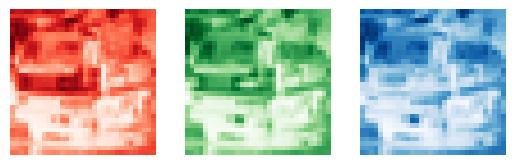

In [53]:
#  - Examine a single image in from your training set. Report the dimensions (width, height, number of channels.) Plot each channel.
sample_image = X_train[0]
print("width: %s, height: %s, channels: %s" % sample_image.shape)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3)
axs[0].axis('off')
axs[0].imshow(sample_image[:, :, 0], cmap='Reds')

axs[1].axis('off')
axs[1].imshow(sample_image[:, :, 1], cmap='Greens')

axs[2].axis('off')
axs[2].imshow(sample_image[:, :, 2], cmap='Blues')

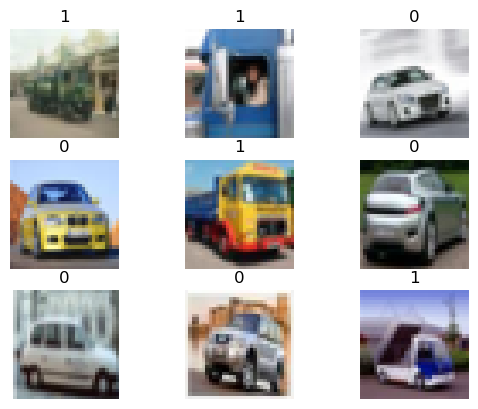

In [70]:
#  - Select 9 random images from your training set. Plot these images in a 3 X 3 grid, along with the corresponding category / label
SAMPLE_SIZE = 9
random_sample_idxs = np.random.choice(X_train.shape[0], size = SAMPLE_SIZE, replace=False)

fig, axs = plt.subplots(3, 3)
axs = axs.flatten()

for a, image, label in zip(axs, X_train[random_sample_idxs, :, :, :], y_train[random_sample_idxs]):
    a.axis('off')
    a.imshow(image)
    a.set_title(label)


[]

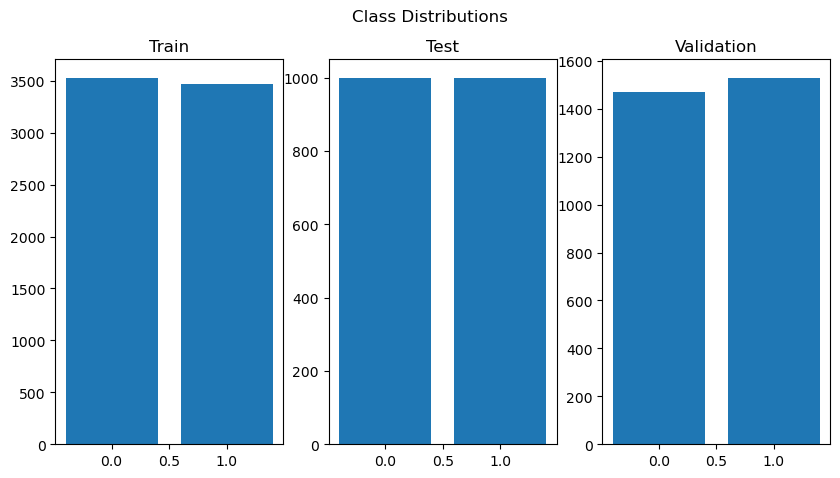

In [97]:
#  - Plot the distribution of labels in your training, validation and test sets. 

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Train
y_train_vals, y_train_cnt = np.unique(y_train, return_counts=True)

axs[0].bar(y_train_vals, y_train_cnt)
axs[0].set_title('Train')

# Test
y_test_vals, y_test_cnt = np.unique(y_test, return_counts=True)

axs[1].bar(y_test_vals, y_test_cnt)
axs[1].set_title('Test')


# Validation
y_val_vals, y_val_cnt = np.unique(y_val, return_counts=True)

axs[2].bar(y_val_vals, y_val_cnt)
axs[2].set_title('Validation')

fig.suptitle('Class Distributions')

plt.plot()


## 2.2 Preprocessing
 
- Rescale the images data, so that the values lie between a range of 0 and 1. 
- Hint: A simple way to do this is to divide by 255.0

In [101]:
### YOUR CODE HERE
X_train_norm = X_train/255
X_test_norm = X_test/255
X_val_norm = X_val/255

## 2.3 Feedforward Neural Network

Reshape your data so that each image is flattened into a 1d array, and each of the train, test and validation sets are 2d arrays. 

Essentially, your data should be an array of length N, where N is the number of observations (images) in the train / test / validation sets. Each element in the array is a flattened image, of length 3072 (32 X 32 X3)     


In [127]:
#### YOUR CODE HERE
X_train_norm.shape
X_train_norm_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_norm_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)
X_val_norm_flat = X_val_norm.reshape(X_val_norm.shape[0], -1)



### 2.3.1 Build a neural network with the following parameters

  - Architecture
     - Input dimensions: 3072 
     - 1 hidden layer: 64 nodes, Relu activation
     - Output layer: 1 node, Sigmoid activation
 - Compile the network:
     - Optimizer: Adam
     - Epochs: 30
     - Batch size: 32
     - Metrics: Accuracy
     - Remember to include the validation data in the compilation step. 
  - Outputs:
      - Plot the training and validation accuracy by epoch (See the example plot below). Do you see any evidence of overfitting in your plot?
      - Report the accuracy, Precision and Recall on the test set
      
**Example plot**

![ffn_performance](images/example_plot_ffn.png)

In [181]:
### YOUR CODE HERE
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from keras.regularizers import l1, l2
import tensorflow as tf

# Instantiate Sequential model
model = Sequential()

#  Architecture
#      - Input dimensions: 3072
model.add(Input(shape=(3072,)))

#      - 1 hidden layer: 64 nodes, Relu activation
model.add(Dense(64, activation='relu'))

#      - Output layer: 1 node, Sigmoid activation
model.add(Dense(1, activation='sigmoid'))

#  - Compile the network:
#      - Optimizer: Adam
#      - Epochs: 30
#      - Batch size: 32
#      - Metrics: Accuracy
#      - Remember to include the validation data in the compilation step. 
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit Model
N_EPOCHS = 30
model_log = model.fit(
    X_train_norm_flat, y_train,
    epochs=N_EPOCHS,
    batch_size=32,
    validation_data=(X_val_norm_flat, y_val)
)

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6242 - loss: 0.6769 - val_accuracy: 0.5973 - val_loss: 0.7272
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - loss: 0.6173 - val_accuracy: 0.6953 - val_loss: 0.5839
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - loss: 0.5973 - val_accuracy: 0.6857 - val_loss: 0.5907
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - loss: 0.5911 - val_accuracy: 0.7127 - val_loss: 0.5682
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7055 - loss: 0.5635 - val_accuracy: 0.7033 - val_loss: 0.5732
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7219 - loss: 0.5509 - val_accuracy: 0.7213 - val_loss: 0.5565
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7251 - loss: 0.5466 - val_accuracy: 0.6963 - val_loss: 0.5694
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7237 - loss: 0.5408 - val_accuracy: 0.

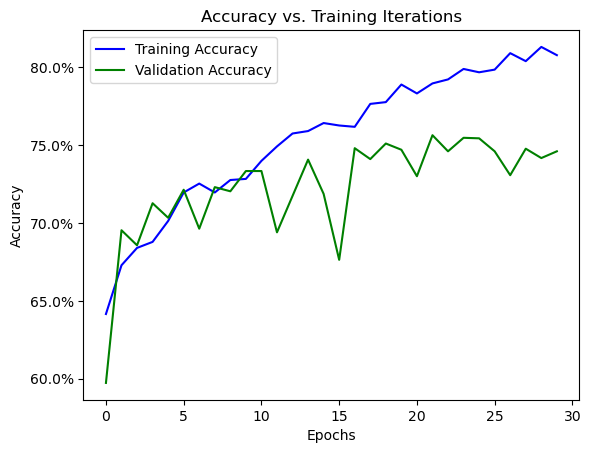

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.7260 - loss: 0.5362
loss: 0.5483306646347046, accuracy: 0.7275000214576721


In [182]:
#   - Outputs:
#       - Plot the training and validation accuracy by epoch (See the example plot below). Do you see any evidence of overfitting in your plot?
#fig = plt.plt
from matplotlib.ticker import PercentFormatter
#fig.plot(np.arange(0, N_EPOCHS))

plt.plot(model_log.history['accuracy'], color='b', label="Training Accuracy")
plt.plot(model_log.history['val_accuracy'], color='g', label='Validation Accuracy')
plt.title('Accuracy vs. Training Iterations')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

#       - Report the accuracy, Precision and Recall on the test set
eval = model.evaluate(X_test_norm_flat, y_test)
print(f'loss: {eval[0]}, accuracy: {eval[1]}' )



*My Response*

In the plot above, there appears to be evidence of overfitting beyond ~10 training epochs. Beyond that point, the training accuracy continues to increase while the validation accuracy stops increasing and they diverge. This is evidence that overfitting is occurring.

### 2.3.2. Tuning / Improving Performance

Now, go ahead and tune this network, or write up your own from scratch. The goal should be to exceed 75% overall classification accuracy on the test set. We don't expect you to implement cross-validation or any formal hyperparameter optimization techniques. Rather, the goal is to arrive at a model architecture that's acceptable to you via trial and error.  

Remember that you have a number of hyperparameters to work with, including
  - the number / dimension of hidden layers
  - choice of activation functions, 
  - type regularization, 
  - optimization techniques 
  
Note that you shouldn't need to train your model for more than 30 epochs.
  
The notebooks from Labs 9 and 10 are also a good starting point.
  
 
**Outputs:**
- In 2-3 sentences, briefly explain the various choices/ decisions you made in building your model architecture. 
- Report the classification accuracy on the test set, along with the precision and recall for each class.
- What do you notice about the precision and recall values, as well as the overall classification accuracy, in comparison to your outputs from 2.3.1?

In [221]:
### YOUR CODE HERE

model2 = Sequential(
    [
        Input(shape=(3072,)), # 32*32*3
        Dense(512, activation='relu'),
        Conv2D(filters=24, kernel_size=(3, 3), strides=1, activation='relu'),
        Dense(512, activation='tanh'),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit Model
N_EPOCHS = 20
model2_log = model2.fit(
    X_train_norm_flat, y_train,
    epochs=N_EPOCHS,
    batch_size=32,
    validation_data=(X_val_norm_flat, y_val)
)

# plot
plt.plot(model2_log.history['accuracy'], color='b', label="Training Accuracy")
plt.plot(model2_log.history['val_accuracy'], color='g', label='Validation Accuracy')
plt.axhline(y = .75, color='grey', linestyle='-', label='75% Threshhold')
plt.title('Accuracy vs. Training Iterations')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

#       - Report the accuracy, Precision and Recall on the test set
eval = model2.evaluate(X_test_norm_flat, y_test)
print(f'Evalauted on Test Set:\n\tloss: {eval[0]}, accuracy: {eval[1]}' )



ValueError: Input 0 of layer "conv2d_5" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 512)

## 2.4. Convolutional Neural Network


### 2.4.1. Build a CNN with the following parameters

  - Architecture
     - Input dimensions: (32, 32,  3) 
     - 1 Conv2D Layer: 
         - Number of filters: 20. 
         - Filter Dimension: 3 X 3. 
         - Activation: Relu
     - Flatten
     - Output layer: 1 node, Sigmoid activation
 - Compile the network:
     - Optimizer: Adam
     - Epochs: 20
     - Metrics: Accuracy
     - Remember to include the validation data in the compilation step. 
  - Outputs:
      - Plot the training and validation accuracy by epoch.
      - Report the accuracy, Precision and Recall on the test set

In [233]:
### Your Code Here:
model_CNN = Sequential(
    [
        Input(shape=(32, 32, 3)),
        Conv2D(filters=20, kernel_size=(3,3), activation='relu'),
        Flatten(),
        Dense(1, activation='sigmoid')
    ]
)

model_CNN.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']    
)

N_EPOCHS = 20
model_CNN_log = model_CNN.fit(
    X_train_norm, y_train,
    epochs=N_EPOCHS,
    batch_size=32,
    validation_data=(X_val_norm, y_val)
)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6431 - loss: 0.6254 - val_accuracy: 0.7220 - val_loss: 0.5535
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7468 - loss: 0.5228 - val_accuracy: 0.7840 - val_loss: 0.4861
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8028 - loss: 0.4474 - val_accuracy: 0.7950 - val_loss: 0.4481
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8358 - loss: 0.3977 - val_accuracy: 0.7890 - val_loss: 0.4423
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8536 - loss: 0.3654 - val_accuracy: 0.8100 - val_loss: 0.4121
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8625 - loss: 0.3466 - val_accuracy: 0.8053 - val_loss: 0.4214
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8717 - loss: 0.3194 - val_accuracy: 0.8147 - val_loss: 0.4256
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8683 - loss: 0.3159 - val_accuracy: 0.

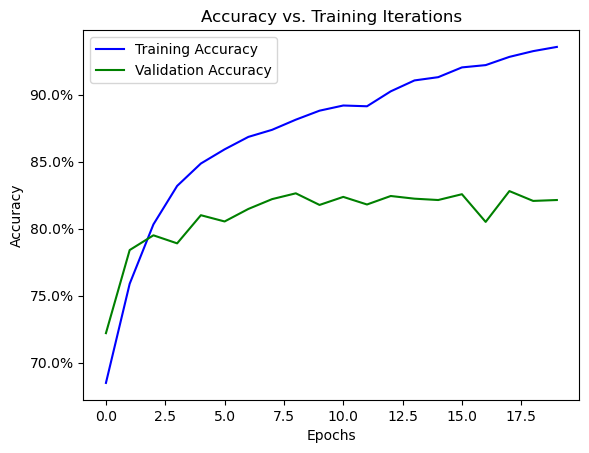

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.3952
Evalauted on Test Set:
	loss: 0.4559500217437744, accuracy: 0.8159999847412109


In [239]:
### YOUR CODE HERE
plt.plot(model_CNN_log.history['accuracy'], color='b', label="Training Accuracy")
plt.plot(model_CNN_log.history['val_accuracy'], color='g', label='Validation Accuracy')
#plt.axhline(y = .75, color='grey', linestyle='-', label='75% Threshhold')
plt.title('Accuracy vs. Training Iterations')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

#       - Report the accuracy, Precision and Recall on the test set
eval = model_CNN.evaluate(X_test_norm, y_test)
print(f'Evalauted on Test Set:\n\tloss: {eval[0]}, accuracy: {eval[1]}' )



### 2.4.2. Tuning / Improving Performance

Now, go ahead and tune this network, or write up your own from scratch. The goal should be to exceed 85% overall classification accuracy on the test set. We don't expect you to implement cross-validation or any formal hyperparameter optimization techniques. Rather, the goal is to arrive at a model architecture that's acceptable to you via trial and error. 

Note that you shouldn't need to train your model for more than 30 epochs. 

Remember that you have a number of hyperparameters to work with, including
  - the number / dimension of hidden layers
  - choice of activation functions, 
  - type regularization, 
  - optimization techniques
  - and other relevant aspects(adding data augmentation etc.)
  
The notebooks from Labs 9 and 10 are a good starting point in terms of putting together a more complex architecture. 

<span style="color:red">Warning!</span> If you intend to attempt **Extra Credit 1 and 2** (below), ensure that you carefully name / store the trained model you build in this step. It's fine to keep trained model in memory, or to save the weights to disk.

  
 
**Outputs:**
 - Report the classification accuracy on the test set, along with the precision and recall for each class. 
 - Briefly explain your model architecture / choices you made in tuning your CNN (No more than 3 - 4 sentences)
 - What do you notice about the precision and recall values, as well as the overall classification accuracy, in comparison to the feed forward neural networks from part 2.3, and your baseline in 2.4.1?

In [10]:
## YOUR CODE HERE


### 2.5: Convolutional Filters

Now, let's attempt to better understand what our CNN is doing under the hood. We'll start by visually examining our convolutional filters. 

- We'll focus on the first convolutional layer in your CNN. 
    - Use the [get_weights()](https://keras.io/api/layers/base_layer/#getweights-method) method to obtain the filters.
    - Plot the first 5 filters, for each channel (your plot will be a grid of 5 X 3). 
    - Your plot will resemble the one below (the exact nature of the visual patterns will depend on your model architecture etc.)
    - What do you observe about the filters you visualize? 
    
**Example output**
 ![Example](images/filters.png)

In [11]:
## YOUR CODE HERE



### Extra Credit 1: Feature Maps

A feature map, or an activation map allows us to examine the result of applying the filters to a given input. The broad intuition is that feature maps closer to the input image detect fine-grained detail, whereas feature maps closer to the output of the model capture more generic aspects. 

Your task is to create and visualize a feature map (i.e the outputs) from the first convolutional layer in your trained CNN. 

In order to do this, proceed as follows:
- Identify a nice image from your training data -- ideally, something that has some distinguishing properties to the naked eye.
- Pass this image through your trained CNN from **2.4.2**, and store the output from the first convolutional layer -- this is your feature map! Note that there are multiple ways to do this; the simplest is to create a copy of your trained CNN, and remove the later layers. The Models function can help you do this. 
- Note that the size of the feature map depends on how many filters you have in the layer. 
- Outputs:
    - plot 1) The raw image from the training data, and 2) the feature map. An example is shown below:
    - what do you observe about the feature maps?
    
**Raw Image**
![Plane](images/plane1.png)

**Feature Map**
![Plane-features](images/plane_feature_map.png)

In [12]:
### YOUR CODE HERE

# First, store the inputs / outputs from the first convolutional / hidden layer in your network.
# Hint: The keras documentation will be helpful (https://keras.io/guides/functional_api/)
# Note that you can create a model using another model/ layer's inputs / outputs:
# model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

# Then, pass your chosen image through(i.e predict)


## Plot the original image, and the feature maps


### Extra Credit 2: Transfer Learning / Fine tuning


Suppose you have a slightly different classification task at hand: to correctly separate trucks from airplanes. 

We'll examine how we can use an already trained model to do this, instead of coding up a new neural network from scratch. 

You are required to implement two approaches:

- First, we'll use the CNN from D2 above -- and simply update the weights.
- Second, we'll load a pre-trained model from keras/ tensorflow (e.g. ResNet50, or VGG19). While these models haven't seen the exact images in this dataset, they have been trained on a large general corpus. Since these models have millions of weights, so we'll implement the following approach:
    - Load a pre-trained model
    - Freeze the weights by setting trainable = False.
    - Build a new model by adding additional layers to the base model.
    - Train the new model and evaluate performance.
    
- Compare the performance of both approaches, and briefly summarize your observations
 
We have provided some helper code and hints in the cells below. 
    
<span style="color:red">Warning!</span> Note that the second approach could be slow / time-consuming. If you are attempting it, please ensure that you budget ~20 mins to 1hour (worst case) for the code to complete running for this part. 

This is a handy reference: https://keras.io/guides/transfer_learning/#transfer-learning-amp-finetuning

In [56]:
def cifar_2moreclasses(pos_class, neg_class):
    """
    Helper code to clean the CIFAR 10 dataset, and remove the unnecessary classes. 
    """
    ## Load data
    label_names = ["airplane", 
             "automobile",
             "bird",
             "cat",
             "deer",
             "dog",
             "frog",
             "horse",
             "ship",
             "truck"]


    label_map = {i:99 for i in range(len(label_names))}
    label_map[pos_class] = 1
    label_map[neg_class] = 0
    
    (X_train_val, y_train_val), (X_test, y_test) = cifar10.load_data()

    (X_train_val, y_train_val), (X_test, y_test) = cifar10.load_data()
    y_train_val1 = np.array([[label_map[y[0]]] for y in y_train_val])
    y_test1 = np.array([[label_map[y[0]]] for y in y_test])
    
    X_train_val_clean = X_train_val[np.where(y_train_val1 != 99)[0]]
    y_train_val_clean =  y_train_val1[np.where(y_train_val1 != 99)]
    
    X_test_clean = X_test[np.where(y_test1 != 99 )[0]]
    y_test_clean = y_test1[np.where(y_test1 != 99)]
    
    return X_train_val_clean, y_train_val_clean, X_test_clean, y_test_clean

In [64]:
## Load data
X_train_val1, y_train_val1, X_test1, y_test1 = cifar_2moreclasses(9, 0)

## Split into train, validation and test.
N_train, N_validation, N_test = 7000, 3000, 2000

X_train1 = X_train_val1[:N_train,:,:]
y_train1 = y_train_val1[:N_train]

X_val1 = X_train_val1[N_train: N_train + N_validation,:,:]
y_val1 = y_train_val1[N_train: N_train + N_validation]

X_test1 = X_test1[:N_test]
y_test1 = y_test1[:N_test]

print(X_train1.shape, X_val1.shape, X_test1.shape)

(7000, 32, 32, 3) (3000, 32, 32, 3) (2000, 32, 32, 3)


In [ ]:
#### APPROACH 1

In [ ]:
from keras.models import clone_model

# Helper Code: Cloning the model (Edit the line below with the name of your model from D2)
model_cnn3 = clone_model( model_from_D2 )

# To do: Compile the model

# To do: Copy weights from model_from_D2. 
#Reference: https://keras.io/2.15/api/models/model_saving_apis/weights_saving_and_loading/


# To do: Preprocess the data

# To do: Train this model (10 epochs)


#To do: Evaluate performance


In [ ]:
### APPROACH 2

In [18]:


## Helper code: load pre-trained model. Feel free to load something else. 
## Available options can be found here: https://keras.io/api/applications/#keras-applications

from keras.applications import ResNet50
base_model_1 = ResNet50(include_top = False, weights='imagenet',input_shape=(32,32,3))

## To Do: Freeze the weights


## Now initialize a new model -- add the pre-trained weights, along with some additional layers. 
# Hint / helper code -- here's one way to do this, but feel free to use your own. 
# model_1= Sequential()
# model_1.add(base_model_1)
# model_1.add(Flatten())



# To Do: Add new dense layers along with Dropout etc. Add at least 2 dense layers -- you are free to pick the number of nodes. 
# Remember to finish with the classification head (i.e Dense layer with 1 node and sigmoid activation. )


## To Do: Compile the Model


In [15]:
## To do: print the model summary. Ensure that weights for the pre-trained model are frozen. 


In [13]:
## To do: Fit the model for 10 epochs. 


In [16]:
#To do: Evaluate model performance

